<a href="https://colab.research.google.com/github/prasys/qrc-mlteamprojects/blob/jake/AutoML_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [20]:
import pandas as pd


# Import Train/Test Data and ML Model

In [21]:
# Import all our data files.

X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_test = pd.read_csv('y_test.csv')
y_train = pd.read_csv('y_train.csv')

In [22]:
y_test

,Class
0,1
1,0
2,0
3,0
4,0
...,...
93982,0
93983,0
93984,0
93985,0


In [23]:
y_train

,Class
0,0
1,0
2,0
3,0
4,0
...,...
190815,0
190816,0
190817,0
190818,0


In [24]:
# X_test

In [25]:
 # X_train

In [26]:
!pip install flaml

In [27]:
# Import our saved ML model.

import joblib
from flaml import AutoML

automl = joblib.load('autoML.joblib')

# Make Some Predictions Using The Model

In [28]:
predictions = automl.predict(X_test)

In [29]:
predictions

array([1, 0, 0, ..., 0, 0, 0])

## Confusion Matrix

In [30]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(predictions, y_test)
cnf_matrix

array([[93833,    26],
       [    5,   123]])

Text(0.5, 427.9555555555555, 'Predicted label')

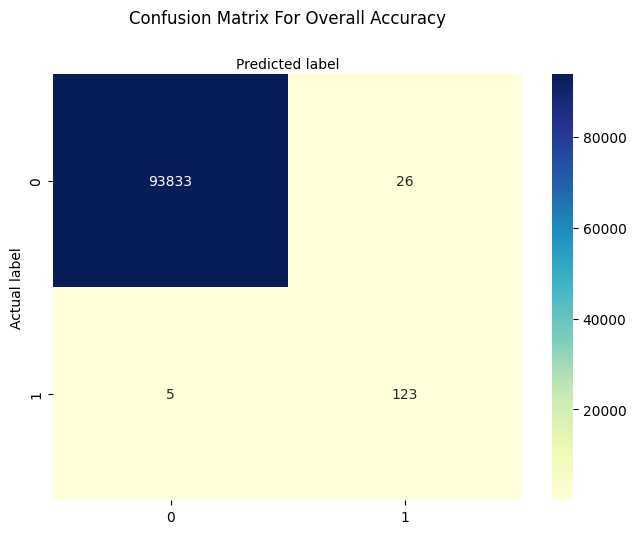

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)



sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix For Overall Accuracy', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Precision Score

In [32]:
# First we will find the precision score of the model.

from sklearn.metrics import precision_score

y_pred_automl = automl.predict(X_test)

precision_score(y_pred_automl ,y_test)

0.825503355704698

### Recall Score

In [33]:
# Next we will check the Recall score of the model.

from sklearn.metrics import recall_score

y_pred_automl = automl.predict(X_test)

recall_score(y_pred_automl ,y_test)

0.9609375

## F1 Score

In [34]:
# Necxt we will check the F1 score of the model.

from sklearn.metrics import f1_score

f1_score(y_test, predictions)

0.888086642599278